In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lungs-diseases-dataset/lung_disease_data.csv


# Doenças Pulmonares - Dataset de análise de gráficos

*Objetivo do Projeto*

Entender o comportamento dos dados, configurar o dataset para a linguagem brasileira, criar insights dos dados e responder perguntas relacionadas ao estudo.

**Tópicos Principais**

***1 - Importação do Dataset***

***2 - Configuração do Dataset***

***3 - Tratamento de Dados***

***4 - Análise Gráfica***

***5 - Conclusão da Análise***


# Importação do Dataset

In [2]:
# Importação do dataset original que posteriormente será transformado e copiado
df_original = pd.read_csv('/kaggle/input/lungs-diseases-dataset/lung_disease_data.csv')
df_original.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes


# Configuração do Dataset

In [3]:
# Criação de uma cópia do dataset original
df_copia = df_original.copy()

In [4]:
# Renomear as colunas em inglês do dataset copiado para português
df_copia = df_copia.rename(columns = {'Age' : 'Idade',
                         'Gender' : 'Gênero',
                         'Smoking Status' : 'Fumante',
                         'Lung Capacity' : 'Capacidade Pulmonar',
                            'Disease Type' : 'Tipo da Doença',
                         'Treatment Type' : 'Tipo do Tratamento',
                         'Hospital Visits' : 'Visitas ao Hospital',
                         'Recovered' : 'Recuperado(a)'})

In [5]:
# Visualizar as 5 primeiras colunas do dataset
df_copia.head()
# OBS: É possível visualizar que tem valores nulos que posteriormente precisaram ser tratados

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Idade,Gênero,Fumante,Capacidade Pulmonar,Tipo da Doença,Tipo do Tratamento,Visitas ao Hospital,Recuperado(a)
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes


In [6]:
# Quantidade de linhas x colunas (5200 linhas x 8 colunas)
df_copia.shape

(5200, 8)

In [7]:
# Verificação dos tipos de dados, quantidade de colunas, se tem valores nulos e a quantidade de cada item
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                4900 non-null   float64
 1   Gênero               4900 non-null   object 
 2   Fumante              4900 non-null   object 
 3   Capacidade Pulmonar  4900 non-null   float64
 4   Tipo da Doença       4900 non-null   object 
 5   Tipo do Tratamento   4900 non-null   object 
 6   Visitas ao Hospital  4900 non-null   float64
 7   Recuperado(a)        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [8]:
# Verificando em quais colunas tem valores nulos e a quantidade
df_copia.isnull().sum()

Idade                  300
Gênero                 300
Fumante                300
Capacidade Pulmonar    300
Tipo da Doença         300
Tipo do Tratamento     300
Visitas ao Hospital    300
Recuperado(a)          300
dtype: int64

In [9]:
# Verificação de valores duplicados
df_copia.duplicated().sum()

91

In [10]:
# Verificação de informações estatísticas como máximo, mínimo, quantidade de valores e os quartis
df_copia.describe()

,Idade,Capacidade Pulmonar,Visitas ao Hospital
count,4900.000000,4900.000000,4900.000000
mean,54.449796,3.501865,7.528571
std,20.126882,1.461179,3.996401
min,20.000000,1.000000,1.000000
25%,37.000000,2.220000,4.000000
50%,54.000000,3.480000,8.000000
75%,72.000000,4.800000,11.000000
max,89.000000,6.000000,14.000000


In [11]:
# Verificar em cada coluna a quantidade de itens que cada valor possui
for i in df_copia.columns:
    print('Coluna Selecionada:',i)
    print(df_copia[i].value_counts())
    print('')

Coluna Selecionada: Idade
Idade
36.0    87
51.0    87
81.0    87
66.0    86
78.0    86
        ..
71.0    59
69.0    57
26.0    56
53.0    56
50.0    53
Name: count, Length: 70, dtype: int64

Coluna Selecionada: Gênero
Gênero
Female    2477
Male      2423
Name: count, dtype: int64

Coluna Selecionada: Fumante
Fumante
Yes    2503
No     2397
Name: count, dtype: int64

Coluna Selecionada: Capacidade Pulmonar
Capacidade Pulmonar
1.93    22
5.16    20
3.79    20
5.77    19
1.50    19
        ..
6.00     3
1.00     3
4.16     3
4.66     2
4.42     2
Name: count, Length: 501, dtype: int64

Coluna Selecionada: Tipo da Doença
Tipo da Doença
Bronchitis     1009
Asthma         1008
COPD           1003
Pneumonia       946
Lung Cancer     934
Name: count, dtype: int64

Coluna Selecionada: Tipo do Tratamento
Tipo do Tratamento
Medication    1655
Therapy       1652
Surgery       1593
Name: count, dtype: int64

Coluna Selecionada: Visitas ao Hospital
Visitas ao Hospital
3.0     396
5.0     384
10.0  

# Tratamento de Dados

In [12]:
# Substituindo em todas as colunas do tipo int e float pela mediana dos valores de cada uma
for i in df_copia.select_dtypes(exclude = 'object').columns:
    df_copia.fillna({i : df_copia[i].mean()}, inplace = True)

In [13]:
# Transformando a coluna idade e visitas ao hospital no tipo inteiro
df_copia['Idade'] = df_copia['Idade'].astype('int')
df_copia['Visitas ao Hospital'] = df_copia['Visitas ao Hospital'].astype('int')

In [14]:
# Substituindo em todas as colunas do tipo object pelo valor mais aparente (moda)
for i in df_copia.select_dtypes(include = 'object').columns:
    df_copia.fillna({i : df_copia[i].mode()[0]}, inplace = True)

In [15]:
# Verificando novamente se ainda tem valores nulos em alguma coluna
df_copia.isnull().sum()

Idade                  0
Gênero                 0
Fumante                0
Capacidade Pulmonar    0
Tipo da Doença         0
Tipo do Tratamento     0
Visitas ao Hospital    0
Recuperado(a)          0
dtype: int64

In [16]:
# Verificação novamente as informações estatísticas como máximo, mínimo, quantidade de valores e os quartis
# após a alteração e substituição dos valores nulos
df_copia.describe()

,Idade,Capacidade Pulmonar,Visitas ao Hospital
count,5200.000000,5200.000000,5200.000000
mean,54.423846,3.501865,7.498077
std,19.537841,1.418395,3.881342
min,20.000000,1.000000,1.000000
25%,38.000000,2.290000,4.000000
50%,54.000000,3.501865,7.000000
75%,71.000000,4.730000,11.000000
max,89.000000,6.000000,14.000000


# Análise Gráfica

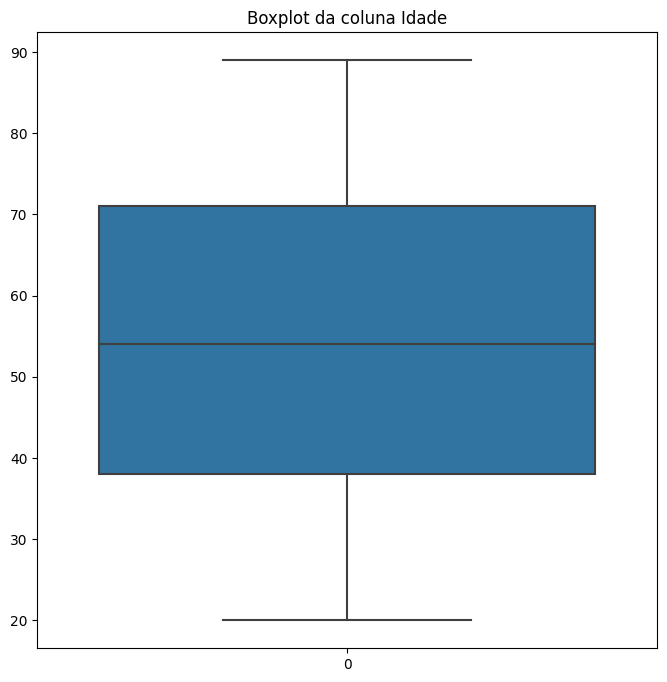

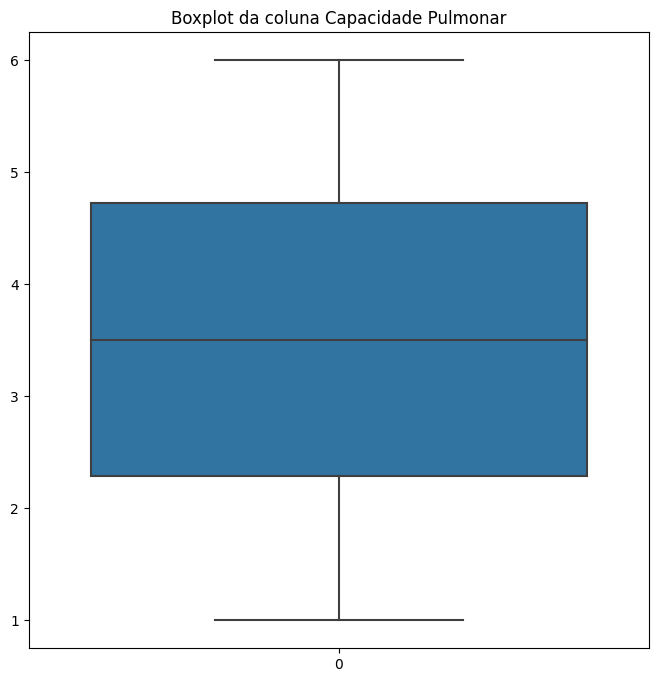

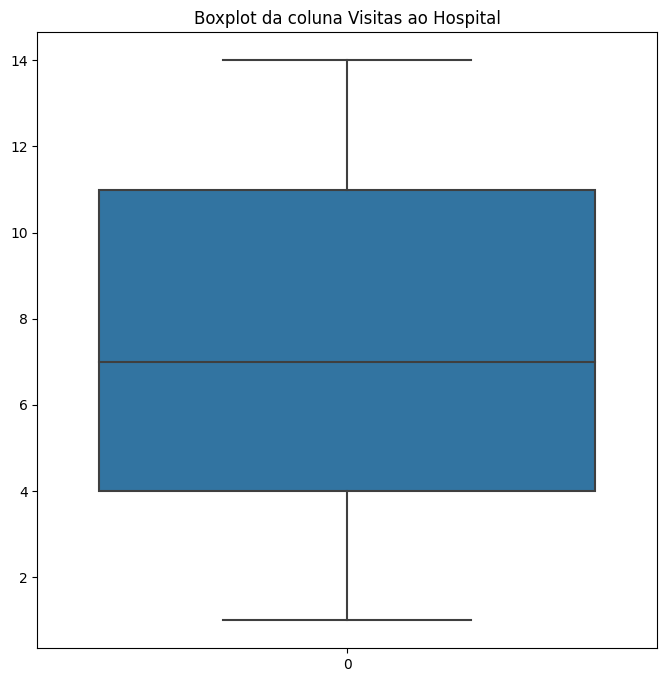

In [17]:
# Verificando os gráficos boxplot das colunas int e float.
# Essa verificação é importante para descobrir se tem valores muito acima da média ou muito abaixo,
# assim como a distribuição dos valores
for i in df_copia.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize = (8,8))
    sns.boxplot(df_copia[i])
    plt.title(f'Boxplot da coluna {i}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


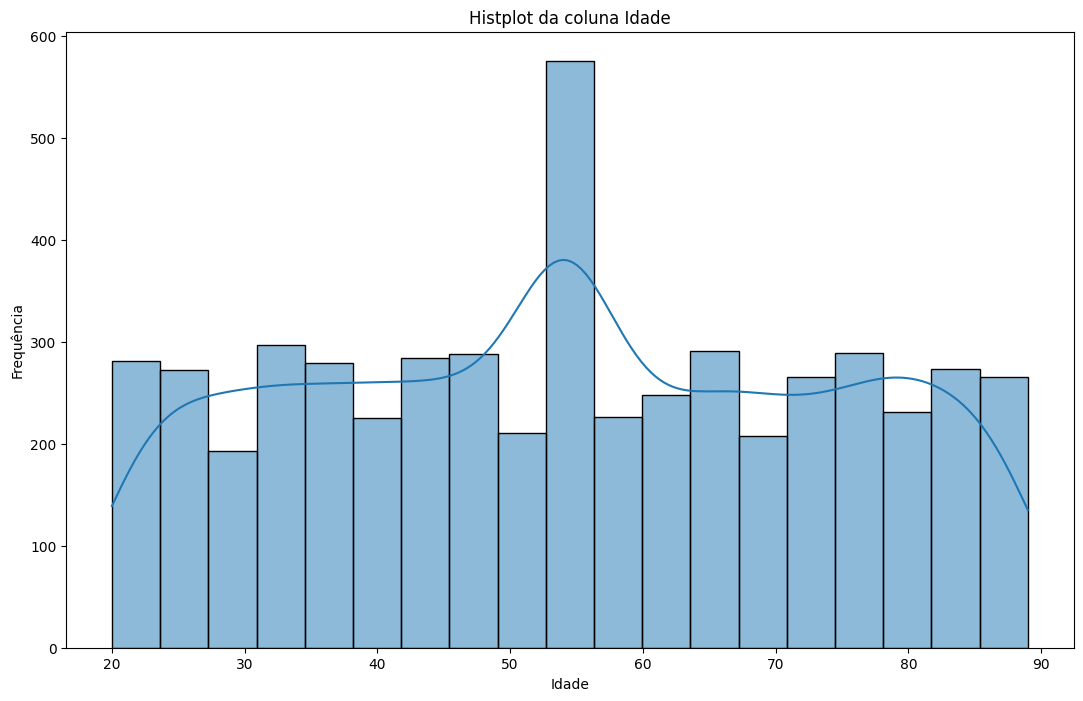

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


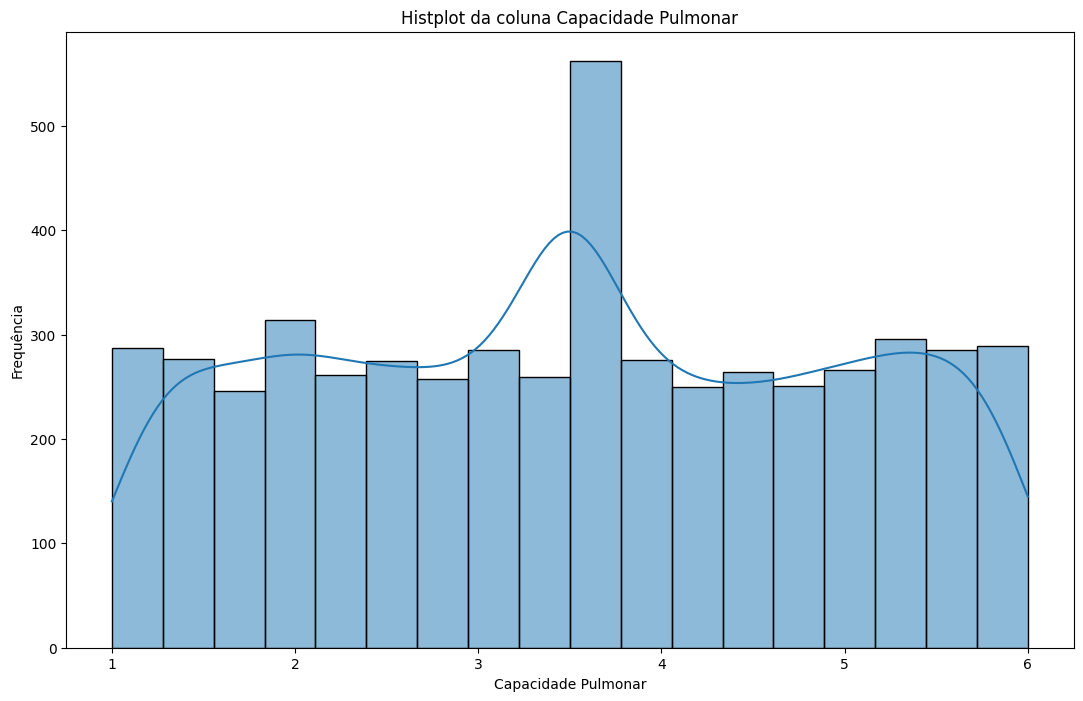

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


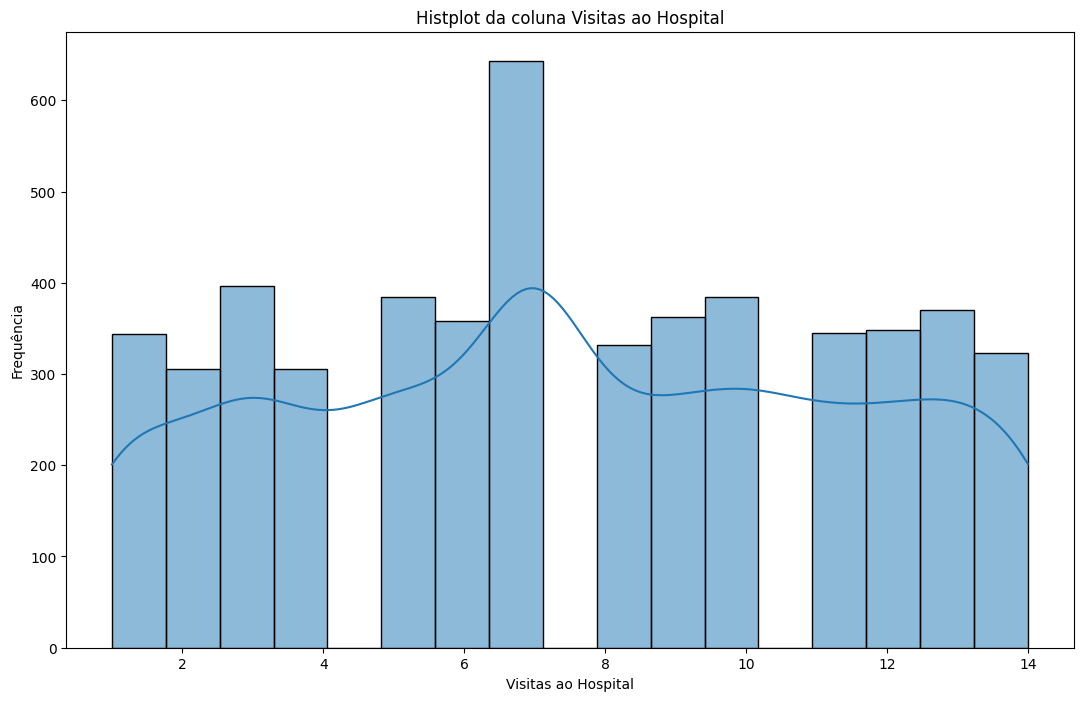

In [18]:
# Verificação dos histplots das colunas do tipo int e float
# Esses gráficos ajudam a visualizar como está distribuido os valores, se estão próximos
# ou muito variados
for i in df_copia.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize = (13,8))
    sns.histplot(df_copia[i], kde = True)
    plt.title(f'Histplot da coluna {i}')
    plt.ylabel('Frequência')
    plt.show()

([<matplotlib.patches.Wedge at 0x7a5c8f423fa0>,
 [Text(0.793629545629844, 0.7616771916654506, "('Female', 'No')"),
  Text(-0.8420315427946956, 0.7078014417467551, "('Female', 'Yes')"),
  Text(-0.6862098021152984, -0.8597186211086063, "('Male', 'No')"),
  Text(0.781567780014973, -0.7740489682458513, "('Male', 'Yes')")],
 [Text(0.4328888430708239, 0.415460286362973, '24.3%'),
  Text(-0.45928993243347027, 0.38607351368004816, '29.1%'),
  Text(-0.3742962556992536, -0.46893742969560337, '21.8%'),
  Text(0.4263096981899852, -0.4222085281341007, '24.8%')])

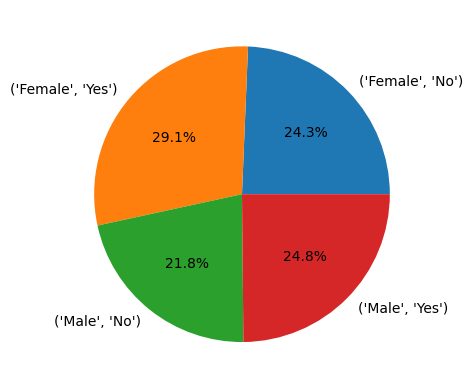

In [19]:
# Verificando a quantidade de mulheres e homens que são fumantes
agrupamento = df_copia.groupby(['Gênero','Fumante']).size()
plt.pie(agrupamento.values, labels = agrupamento.index, autopct = '%.1f%%')
# OBS: 29.1 % das mulheres são fumantes, sendo a maioria em comparação ao homens que fumam

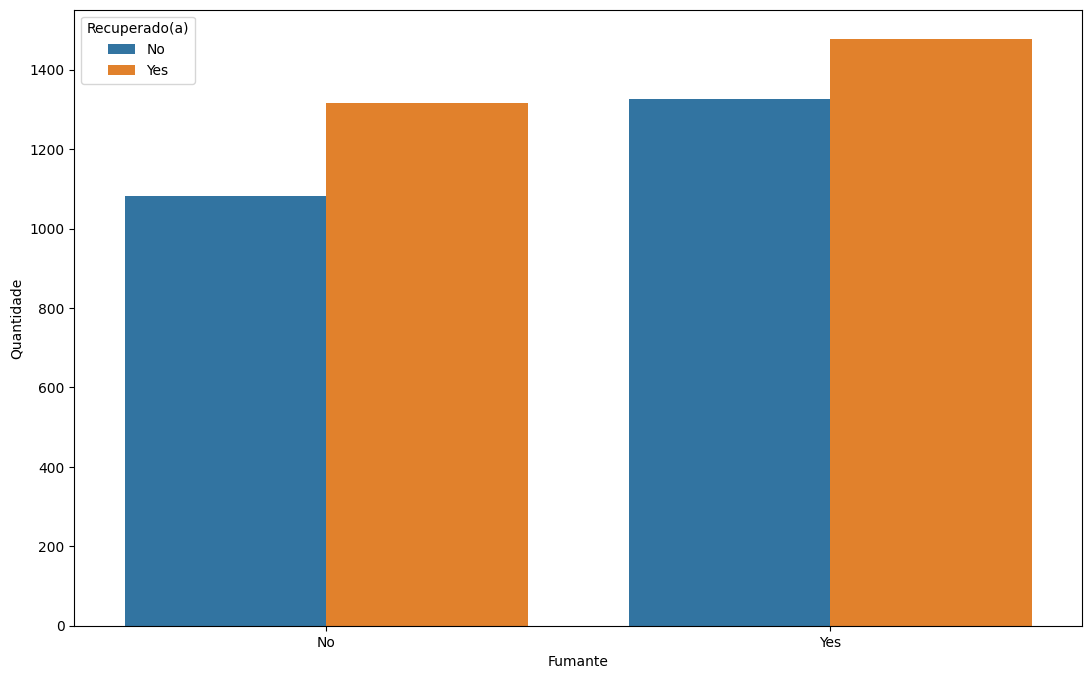

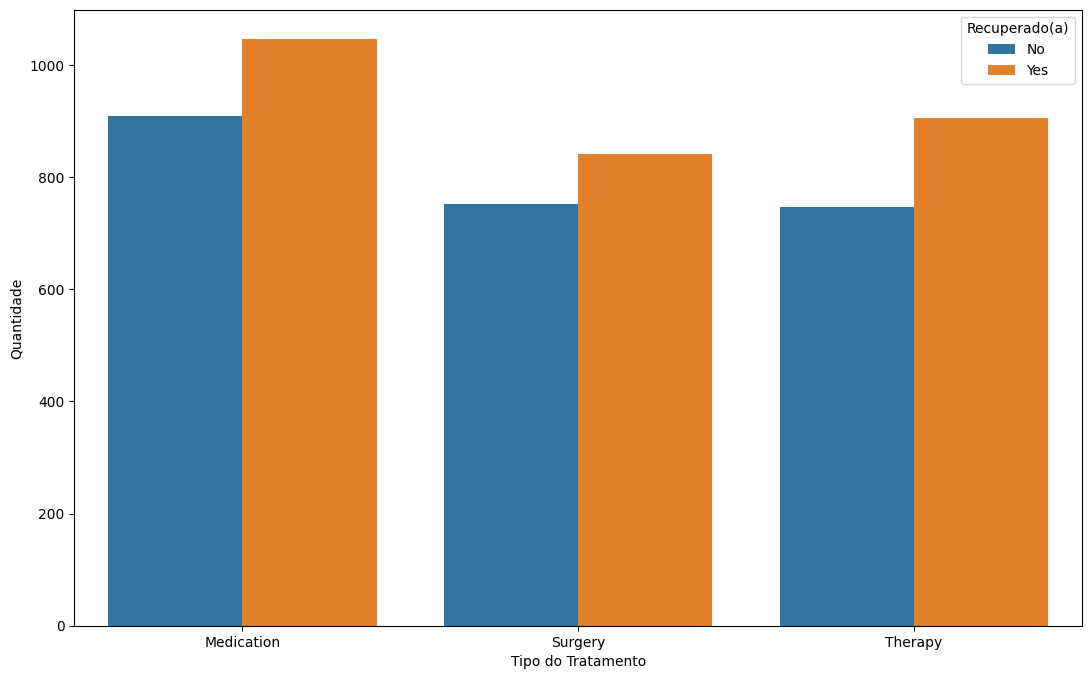

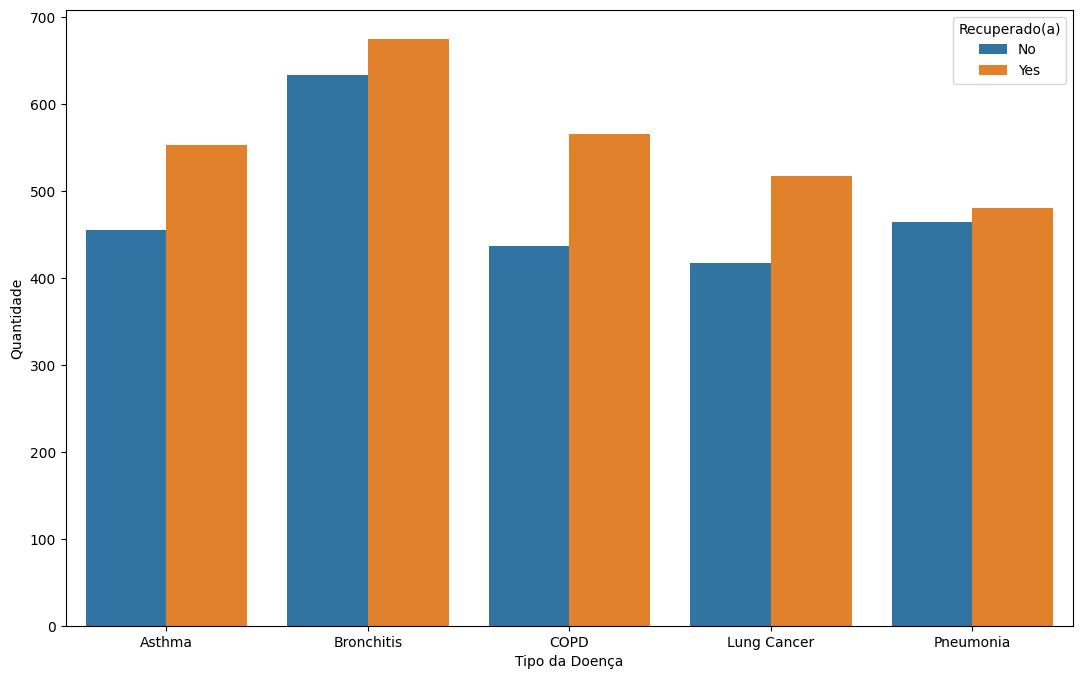

In [20]:
# Verificando os gráficos de barras dos agrupamentos 
# Esses gráficos ajudam a visualizar a quantidade de pessoas que se recuperaram 
# 1 - Quantidade de fumantes que se recuperaram
# 2 - Quantidade de recuperados de acordo com o tipo de tratamento
# 3 - Quantidade de recuperados de acordo com o tipo da doença
for i in df_copia[['Fumante','Tipo do Tratamento','Tipo da Doença']].columns:
    plt.figure(figsize = (13,8))
    agrupamento = df_copia.groupby([i,'Recuperado(a)']).size().reset_index(name='Quantidade')
    sns.barplot(agrupamento, x = i, y = 'Quantidade', hue = 'Recuperado(a)')
    plt.show()

<Figure size 1300x800 with 0 Axes>

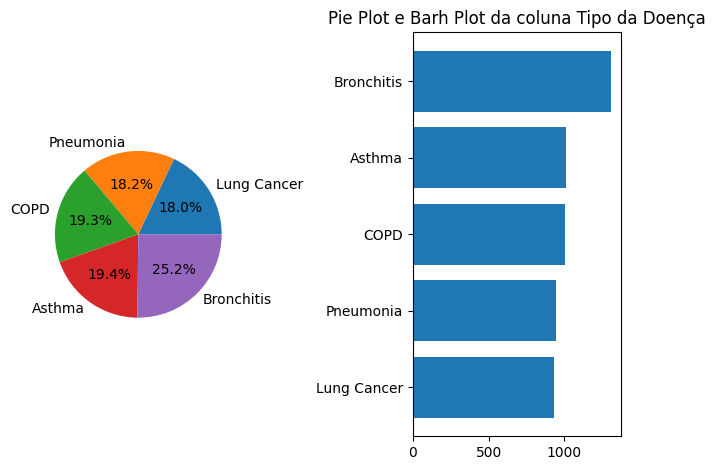

<Figure size 1300x800 with 0 Axes>

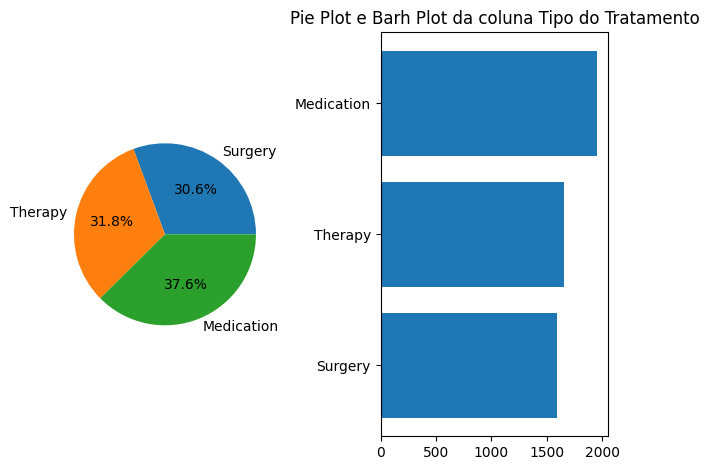

In [21]:
# Verificar como está distribuido em porcentagem e gráficos de barras os agrupamentos
# 1 - Percentual da quantidade de doenças pulmonares e a quantidade de cada uma
# 2 - Percentual da quantidade de tratamentos e a quantidade de cada um
for i in df_copia.iloc[:,4:6].columns:
    plt.figure(figsize = (13,8))
    fig, axs = plt.subplots(1, 2)
    agrupamento = df_copia.groupby(i).size().sort_values(ascending = True)
    axs[0].pie(agrupamento.values, labels = agrupamento.index, autopct = '%1.1f%%')
    axs[1].barh(agrupamento.index, agrupamento.values)
    plt.title(f'Pie Plot e Barh Plot da coluna {i}')
    plt.tight_layout()
    plt.show() 

# Conclusão da Análise

*O dataset é muito bom para testar conceitos básicos como agrupamento, label encoder, criação de gráficos, tratamento de valores nulos e substituição de colunas.*

*Posteriormente é possível implementar modelos de Machine Learning para prever a recuperação do paciente*

*O dataset contribuiu muito para meu estudo na área de ciência de dados, em especial a parte de manipulação das estruturas de repetição que facilitaram a criação de gráficos, assim como a visualização de informações de cada coluna*

# 